<a href="https://colab.research.google.com/github/vitroid/DelaunayExtrapolation/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install delaunayextrapolation

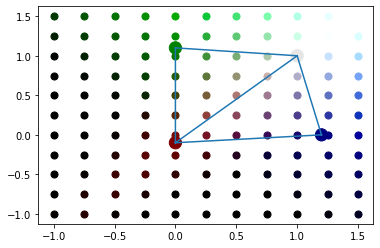

In [ ]:
from delaunayextrapolation import DelaunayE

# 代表点の座標。4つだけ。このサンプルでは、プロットしやすいように2次元にしたが、
# まりかの場合には、CGでのcolor chart色24色がここに入る。(3次元)
# (Delaunay三角形分割ではなく、空間の四面体分割になる。でもやりかたは同じ)
points = np.array([[0, -0.1], [0, 1.1], [1.2, 0], [1, 1]])

# 代表点で空間をDelaunay三角形分割
tri = DelaunayE(points)

# 補間したい、代表点ごとの値。ここでは色(RGB)にしたが、線形補間できるものならなんでもいい。
# まりかの場合には、Canonのcolor chart色24色がここに入る。
colors = np.array([[0.5, 0.0, 0.0],     #dark red
                   [0.0, 0.5, 0.0],     #dark green
                   [0.0, 0.0, 0.5],     #dark blue
                   [0.9, 0.9, 0.90]])   #90% gray

# 0.1間隔で
p = []
for ix in range(11):
    for iy in range(11):
        # 補間したい格子点(cg色)
        x, y = ix/4-1, iy/4-1
        p = np.array([x, y])
        # pを含むのはどの三角形か、そしてその中での内挿比は?
        v, mix = tri.mixratio(p)
        # その比率で、頂点の色を混ぜる。
        mixedcolor = mix @ colors[v]
        # ↑分かりやすく書くと、
        # mixedcolor = mix[0]* colors[v[0]] + mix[1]* colors[v[1]] +mix[0]* colors[v[2]] 
        # 外挿するとRGBの値の範囲を越える可能性があるので、0〜1を越えたらclip
        mixedcolor = np.clip(mixedcolor, 0.0, 1.0)
        # mixedcolorは、cg色に対応する、canon色

        # 内挿点の散布図 
        plt.scatter(x, y, s=50, facecolor=mixedcolor)

# Delaunay三角形
plt.triplot(points[:,0], points[:,1], tri.simplices)
# 代表点
plt.scatter(points[:,0], points[:,1], s=150, facecolor=colors)
plt.show()

# 以下は開発用

与えられた点でDelaunay三角形分割し、それとは別の点を最初の点の混合で表す。

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html の内容をほとんどそのまま使った。

In [ ]:
from scipy.spatial import Delaunay
import numpy as np

# 代表点。4つだけ。
points = np.array([[0, -0.1], [0, 1.1], [1.2, 0], [1, 1]])
# 補間したい、代表点ごとの代表色
colors = np.array([[0.5, 0.0, 0.0],     #dark red
                   [0.0, 0.5, 0.0],     #dark green
                   [0.0, 0.0, 0.5],     #dark blue
                   [0.3, 0.3, 0.30]])   #30% gray

# いきなりDelaunay三角形分割
tri = Delaunay(points)
tri

`tri`の中身を見る。

In [ ]:
tri.__dict__

{'_points': array([[ 0. , -0.1],
        [ 0. ,  1.1],
        [ 1.2,  0. ],
        [ 1. ,  1. ]]),
 '_qhull': None,
 '_transform': None,
 '_vertex_neighbor_vertices': None,
 '_vertex_to_simplex': None,
 'coplanar': array([], shape=(0, 3), dtype=int32),
 'equations': array([[ 0.49314377,  0.34383678, -0.79911544,  0.03438368],
        [ 0.39322352,  0.44182418, -0.80632913,  0.04418242]]),
 'furthest_site': False,
 'good': array([1, 1], dtype=int32),
 'max_bound': array([1.2, 1.1]),
 'min_bound': array([ 0. , -0.1]),
 'ndim': 2,
 'neighbors': array([[ 1, -1, -1],
        [-1,  0, -1]], dtype=int32),
 'npoints': 4,
 'nsimplex': 2,
 'paraboloid_scale': 0.5479452054794519,
 'paraboloid_shift': -0.005479452054794521,
 'simplices': array([[2, 3, 0],
        [3, 1, 0]], dtype=int32),
 'vertices': array([[2, 3, 0],
        [3, 1, 0]], dtype=int32)}

三角形を描く。

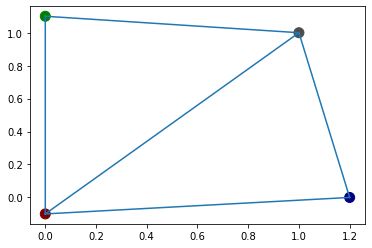

In [ ]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.scatter(points[:,0], points[:,1], s=100, facecolor=colors)
plt.show()

3つの点が、どの三角形の中にあるかを判定する。

In [ ]:
p = np.array([(0.1, 0.2), (1.5, 0.5), (0.5, 1.05)])
tri.find_simplex(p)

array([ 1, -1,  1], dtype=int32)

最初と最後の点は三角形1の中にあり、2番目の点はどの三角にも属していない。

三角形1の中で、3つの点がどんな位置にあるか(混合比)を求める。

In [ ]:
b = tri.transform[1,:2].dot(np.transpose(p - tri.transform[1,2]))
np.c_[np.transpose(b), 1 - b.sum(axis=0)]


array([[ 0.1       ,  0.15833333,  0.74166667],
       [ 1.5       , -0.875     ,  0.375     ],
       [ 0.5       ,  0.5       ,  0.        ]])

1 [3 1 0] [0.         0.08333333 0.91666667]
1 [3 1 0] [0.         0.16666667 0.83333333]
1 [3 1 0] [0.   0.25 0.75]
1 [3 1 0] [0.         0.33333333 0.66666667]
1 [3 1 0] [0.         0.41666667 0.58333333]
1 [3 1 0] [0.  0.5 0.5]
1 [3 1 0] [0.         0.58333333 0.41666667]
1 [3 1 0] [0.         0.66666667 0.33333333]
1 [3 1 0] [0.   0.75 0.25]
1 [3 1 0] [0.         0.83333333 0.16666667]
1 [3 1 0] [0.         0.91666667 0.08333333]
0 [2 3 0] [0.00819672 0.09016393 0.90163934]
1 [3 1 0] [0.1   0.075 0.825]
1 [3 1 0] [0.1        0.15833333 0.74166667]
1 [3 1 0] [0.1        0.24166667 0.65833333]
1 [3 1 0] [0.1   0.325 0.575]
1 [3 1 0] [0.1        0.40833333 0.49166667]
1 [3 1 0] [0.1        0.49166667 0.40833333]
1 [3 1 0] [0.1   0.575 0.325]
1 [3 1 0] [0.1        0.65833333 0.24166667]
1 [3 1 0] [0.1        0.74166667 0.15833333]
1 [3 1 0] [0.1   0.825 0.075]
0 [2 3 0] [0.09836066 0.08196721 0.81967213]
0 [2 3 0] [0.01639344 0.18032787 0.80327869]
1 [3 1 0] [0.2        0.06666667 0.73

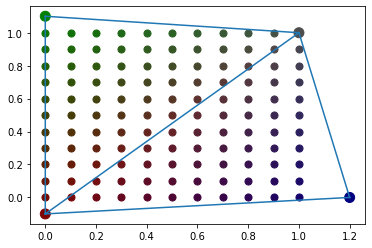

In [ ]:


# 0.1間隔で
p = []
for ix in range(11):
    for iy in range(11):
        x, y = ix/10, iy/10
        p = np.array([[x, y]])
        # 点がどっちの三角形に属するか。
        which = tri.find_simplex(p)[0]
        b = tri.transform[which,:2].dot(np.transpose(p - tri.transform[which,2]))
        # 混合比
        mix = np.c_[np.transpose(b), 1 - b.sum(axis=0)][0]
        # その三角形を構成する頂点の番号を割りだす。
        v = tri.simplices[which]
        # 
        print(which, v, mix)
        # その比率で、頂点の色を混ぜる。
        # mixedcolor = mix[0]*colors[v[0]] + mix[1]*colors[v[1]] + mix[2]*colors[v[2]]
        # simpler expression
        mixedcolor = mix @ colors[v]
        plt.scatter(x, y, s=50, facecolor=mixedcolor)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.scatter(points[:,0], points[:,1], s=100, facecolor=colors)
plt.show()

内挿はできることがわかった。三次元空間の分割の場合も処理はほぼ同じ。

問題は外挿。外挿の場合には、whichが決まらない。一番近い三角形を自力で決めなければいけない。

$x^2+y^2$で持ちあげた代表点が作る平面のうち、一番上を通るもの点を使えばいい。24点しかないなら、三角形の数も50個程度なので、網羅的に計算しても問題なかろう。平面の式が与えられていたので、それで自力で計算できると思うぞ。

In [ ]:
x,y = points[1,0:2]
z = (x**2+y**2)/2
v = np.array([x,y,z,1])
tri.equations[0] * v, v * tri.equations[1]

(array([ 0.        ,  0.37822046, -0.48346484,  0.03438368]),
 array([ 0.        ,  0.4860066 , -0.48782912,  0.04418242]))

In [ ]:
tri.equations

array([[ 0.49314377,  0.34383678, -0.79911544,  0.03438368],
       [ 0.39322352,  0.44182418, -0.80632913,  0.04418242]])

equationsの意味がよくわかっていない。自力で式を生成したほうがてっとりばやい。

Delaunayで得られたすべての三角形のもちあげ平面の方程式を書き下す。

In [ ]:
# 次元を上げる。2次元なら3次元にする。
pulledup = np.zeros([points.shape[0], points.shape[1]+1])
# 2次元まではそのままコピー
pulledup[:,:-1] = points
# 3次元目には、二乗和を入れる。
pulledup[:, -1] = np.sum(pulledup[:]**2, axis=1)
# こんな感じ。
pulledup

array([[ 0.  , -0.1 ,  0.01],
       [ 0.  ,  1.1 ,  1.21],
       [ 1.2 ,  0.  ,  1.44],
       [ 1.  ,  1.  ,  2.  ]])

In [ ]:
def plane(p):
    # ax+by+cz+e=1を満足するabceを求める。
    # (x,y,z,1) @ (a,b,c,e) = 1
    # pseudo-inverse matrix?
    q = np.zeros([p.shape[0], p.shape[1]+1])
    q[:,:-1] = p
    q[:, -1] = 1
    qplus = q.T @ np.linalg.inv(q @ q.T)
    abce = qplus @ np.ones(q.shape[0])
    # ax+by+cz = 1-e = d
    abcd = abce.copy()
    abcd[-1] = 1 - abce[-1]
    return abcd

dimen = points[0].shape[0]
planes = np.zeros([len(tri.simplices), dimen+2]) 
for i, simplex in enumerate(tri.simplices):
    # simplexの3点を通る方程式を定める。
    # ax+by+cz=d を3つの点のいずれでも満たすようなa,b,c,dを求めたい。
    abcd = plane(pulledup[simplex])
    planes[i] = abcd

# もちあげた平面のうちで、与えられた(x,y)でのz座標が最も高いものをさがす。
# ax+by+cz=d; z = (d-ax-by)/c
x,y = 0.5, 0.7
z = (planes[:, 3] - planes[:, 0]*x - planes[:, 1]*y) / planes[:,2]
which = np.argsort(z)[-1]

planes


array([[-0.03446405, -0.02402952,  0.03060127,  0.00270896],
       [-0.03491192, -0.03922687,  0.03922687,  0.00431496]])

In [ ]:
'equations': array([[ 0.49314377,  0.34383678, -0.79911544,  0.03438368],
        [ 0.39322352,  0.44182418, -0.80632913,  0.04418242]]),
 

1 [3 1 0] [-1.          0.16666667  1.83333333]
1 [3 1 0] [-1.     0.375  1.625]
1 [3 1 0] [-1.          0.58333333  1.41666667]
1 [3 1 0] [-1.          0.79166667  1.20833333]
1 [3 1 0] [-1.  1.  1.]
1 [3 1 0] [-1.          1.20833333  0.79166667]
1 [3 1 0] [-1.          1.41666667  0.58333333]
1 [3 1 0] [-1.     1.625  0.375]
1 [3 1 0] [-1.          1.83333333  0.16666667]
1 [3 1 0] [-1.          2.04166667 -0.04166667]
1 [3 1 0] [-1.    2.25 -0.25]
0 [2 3 0] [ 0.06147541 -0.82377049  1.76229508]
1 [3 1 0] [-0.75        0.14583333  1.60416667]
1 [3 1 0] [-0.75        0.35416667  1.39583333]
1 [3 1 0] [-0.75    0.5625  1.1875]
1 [3 1 0] [-0.75        0.77083333  0.97916667]
1 [3 1 0] [-0.75        0.97916667  0.77083333]
1 [3 1 0] [-0.75    1.1875  0.5625]
1 [3 1 0] [-0.75        1.39583333  0.35416667]
1 [3 1 0] [-0.75        1.60416667  0.14583333]
1 [3 1 0] [-0.75    1.8125 -0.0625]
1 [3 1 0] [-0.75        2.02083333 -0.27083333]
0 [2 3 0] [ 0.28688525 -0.8442623   1.55737705]
0 [2

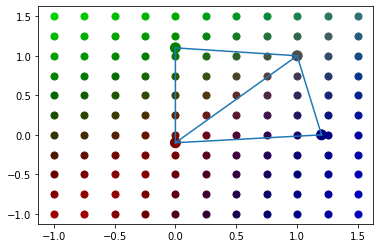

In [ ]:


# 0.1間隔で
p = []
for ix in range(11):
    for iy in range(11):
        x, y = ix/4-1, iy/4-1
        p = np.array([[x, y]])
        # 点がどっちの三角形に属するか。
        z = (planes[:, 3] - planes[:, 0]*x - planes[:, 1]*y) / planes[:,2]
        which = np.argsort(z)[-1]
        # which = tri.find_simplex(p)[0]
        b = tri.transform[which,:2].dot(np.transpose(p - tri.transform[which,2]))
        # 混合比
        mix = np.c_[np.transpose(b), 1 - b.sum(axis=0)][0]
        # その三角形を構成する頂点の番号を割りだす。
        v = tri.simplices[which]
        # 
        print(which, v, mix)
        # その比率で、頂点の色を混ぜる。
        # mixedcolor = mix[0]*colors[v[0]] + mix[1]*colors[v[1]] + mix[2]*colors[v[2]]
        # simpler expression
        mixedcolor = np.clip(mix @ colors[v], 0.0, 1.0)
        plt.scatter(x, y, s=50, facecolor=mixedcolor)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.scatter(points[:,0], points[:,1], s=100, facecolor=colors)
plt.show()

できた。これをパッケージングする。

In [37]:
from scipy.spatial import Delaunay
import numpy as np

def plane(p):
    # ax+by+cz+e=1を満足するabceを求める。
    # (x,y,z,1) @ (a,b,c,e) = 1
    # pseudo-inverse matrix?
    q = np.zeros([p.shape[0], p.shape[1]+1])
    q[:,:-1] = p
    q[:, -1] = 1
    qplus = q.T @ np.linalg.inv(q @ q.T)
    abce = qplus @ np.ones(q.shape[0])
    # ax+by+cz = 1-e = d
    abcd = abce.copy()
    abcd[-1] = 1 - abce[-1]
    return abcd


class DelaunayE(Delaunay):
    def __init__(self, *args, **kwarg):
        super().__init__(*args, **kwarg)
        # 次元を上げる。2次元なら3次元にする。
        pulledup = np.zeros([self._points.shape[0], self._points.shape[1]+1])
        # 2次元まではそのままコピー
        pulledup[:,:-1] = self._points
        # 3次元目には、二乗和を入れる。
        pulledup[:, -1] = np.sum(pulledup[:]**2, axis=1)        

        self.planes = np.zeros([self.nsimplex, self.ndim+2]) 
        for i, simplex in enumerate(self.simplices):
            # simplexの3点を通る方程式を定める。
            # ax+by+cz=d を3つの点のいずれでも満たすようなa,b,c,dを求めたい。
            abcd = plane(pulledup[simplex])
            self.planes[i] = abcd

    def extrapolate_simplex(self, p):
        z = (self.planes[:, -1] - self.planes[:, :-2] @ p) / self.planes[:,-2]
        which = np.argmax(z)
        return which

    def mixratio(self, p):
        which = self.extrapolate_simplex(p)
        # choose the first vertex of the simplex as the origin
        origin = self._points[self.simplices[which][0]]
        # position of p relative to origin
        pp = p - origin
        # relative positions of the vextices of the simplex
        ps = self._points[self.simplices[which][1:]] - origin
        ratio = np.zeros(self.ndim+1)
        ratio[1:] = pp @ np.linalg.inv(ps)
        ratio[0]  = 1 - np.sum(ratio[1:])
        return self.simplices[which], ratio

    def extrapolate_simplices(self, p):
        """
        pは2次元の点の集合.
        その点からz方向にもちあげて、最も上で交差する平面の集合を返す。
        """
        print(self.planes[:, :-2].shape, p.T.shape)
        A = self.planes[:, :-2] @ p.T
        print(A)
        B = self.planes[:, -1] - A.T
        z = B / self.planes[:,-2]
        which = np.argmax(z, axis=1)
        print(which)
        return which

    def mixratios(self, p):
        which = self.extrapolate_simplices(p)
        #それぞれのsimplexでoriginを定める。
        origins = self._points[self.simplices[:,0]]
        print(origins)
        ps = np.zeros([self.nsimplex, self.ndim, self.ndim])
        for i in range(self.ndim):
            ps[:, i, :] = self._points[self.simplices[:,i+1]] - origins
        psi = np.zeros_like(ps)
        for i in range(self.nsimplex):
            psi[i] = np.linalg.inv(ps[i])
        print(psi.shape)
        # position of p relative to origin
        pp = p - origins[which]
        # relative positions of the vextices of the simplex
        ratio = np.zeros([p.shape[0], self.ndim+1])
        for i in range(p.shape[0]):
            ratio[i, 1:] = pp[i] @ psi[which[i]]
        ratio[:, 0]  = 1 - np.sum(ratio[:, 1:], axis=1)
        return self.simplices[which], ratio


import matplotlib.pyplot as plt

# 代表点。4つだけ。
points = np.array([[0, -0.1], [0, 1.1], [1.2, 0], [1, 1]])
# 補間したい、代表点ごとの代表色
colors = np.array([[0.5, 0.0, 0.0],     #dark red
                   [0.0, 0.5, 0.0],     #dark green
                   [0.0, 0.0, 0.5],     #dark blue
                   [0.1, 0.2, 0.3]])   #90% gray

# いきなりDelaunay三角形分割
tri = DelaunayE(points)

#まとめて内挿したい。
# 0.1間隔で
p = []
for ix in range(11):
    for iy in range(11):
        x, y = ix/4-1, iy/4-1
        p.append([x,y])

p = np.array(p)
# どの三角形か、その中の内挿比
v, mix = tri.mixratios(p)
print(v, p, mix)
# 一応書けたものの、ループが残っているし、あとの処理も簡単にならないので、
# pをまとめて与えるタイプの関数は提供しない。ここに記録だけ残しておくか、一応gitにも上げるか。


(2, 2) (2, 121)
[[ 0.05849357  0.05248619  0.04647881  0.04047143  0.03446405  0.02845667
   0.02244929  0.01644191  0.01043453  0.00442715 -0.00158023  0.04987756
   0.04387018  0.0378628   0.03185542  0.02584804  0.01984066  0.01383328
   0.0078259   0.00181852 -0.00418886 -0.01019624  0.04126155  0.03525417
   0.02924679  0.02323941  0.01723203  0.01122465  0.00521727 -0.00079011
  -0.00679749 -0.01280487 -0.01881225  0.03264553  0.02663815  0.02063077
   0.01462339  0.00861601  0.00260863 -0.00339875 -0.00940613 -0.01541351
  -0.02142089 -0.02742827  0.02402952  0.01802214  0.01201476  0.00600738
   0.         -0.00600738 -0.01201476 -0.01802214 -0.02402952 -0.0300369
  -0.03604428  0.01541351  0.00940613  0.00339875 -0.00260863 -0.00861601
  -0.01462339 -0.02063077 -0.02663815 -0.03264553 -0.03865291 -0.04466029
   0.00679749  0.00079011 -0.00521727 -0.01122465 -0.01723203 -0.02323941
  -0.02924679 -0.03525417 -0.04126155 -0.04726893 -0.05327631 -0.00181852
  -0.0078259  -0.013833

ValueError: ignored

In [35]:
mixedcolor.shape

(121, 121, 3)

[3 1 0] [-1. -1.] [-1.          0.16666667  1.83333333]
[3 1 0] [-1.   -0.75] [-1.     0.375  1.625]
[3 1 0] [-1.  -0.5] [-1.          0.58333333  1.41666667]
[3 1 0] [-1.   -0.25] [-1.          0.79166667  1.20833333]
[3 1 0] [-1.  0.] [-1.  1.  1.]
[3 1 0] [-1.    0.25] [-1.          1.20833333  0.79166667]
[3 1 0] [-1.   0.5] [-1.          1.41666667  0.58333333]
[3 1 0] [-1.    0.75] [-1.     1.625  0.375]
[3 1 0] [-1.  1.] [-1.          1.83333333  0.16666667]
[3 1 0] [-1.    1.25] [-1.          2.04166667 -0.04166667]
[3 1 0] [-1.   1.5] [-1.    2.25 -0.25]
[2 3 0] [-0.75 -1.  ] [ 0.06147541 -0.82377049  1.76229508]
[3 1 0] [-0.75 -0.75] [-0.75        0.14583333  1.60416667]
[3 1 0] [-0.75 -0.5 ] [-0.75        0.35416667  1.39583333]
[3 1 0] [-0.75 -0.25] [-0.75    0.5625  1.1875]
[3 1 0] [-0.75  0.  ] [-0.75        0.77083333  0.97916667]
[3 1 0] [-0.75  0.25] [-0.75        0.97916667  0.77083333]
[3 1 0] [-0.75  0.5 ] [-0.75    1.1875  0.5625]
[3 1 0] [-0.75  0.75] [-0.75      

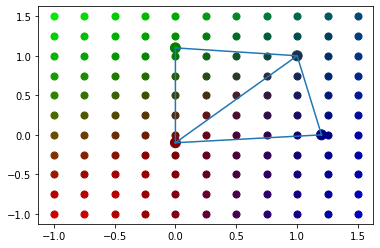

In [8]:
import matplotlib.pyplot as plt

# 代表点。4つだけ。
points = np.array([[0, -0.1], [0, 1.1], [1.2, 0], [1, 1]])
# 補間したい、代表点ごとの代表色
colors = np.array([[0.5, 0.0, 0.0],     #dark red
                   [0.0, 0.5, 0.0],     #dark green
                   [0.0, 0.0, 0.5],     #dark blue
                   [0.1, 0.2, 0.3]])   #90% gray

# いきなりDelaunay三角形分割
tri = DelaunayE(points)

# 0.1間隔で
p = []
for ix in range(11):
    for iy in range(11):
        x, y = ix/4-1, iy/4-1
        p = np.array([x, y])
        # どの三角形か、その中の内挿比
        v, mix = tri.mixratio(p)
        print(v, p, mix)
        # その比率で、頂点の色を混ぜる。
        mixedcolor = mix @ colors[v]
        # 0〜1を越えたらclip
        mixedcolor = np.clip(mixedcolor, 0.0, 1.0)
        plt.scatter(x, y, s=50, facecolor=mixedcolor)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.scatter(points[:,0], points[:,1], s=100, facecolor=colors)
plt.show()

In [ ]:
Delaunay.find_simplex?